# IMPORTING LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [3]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

# VISUALISING THE DATA

[4]


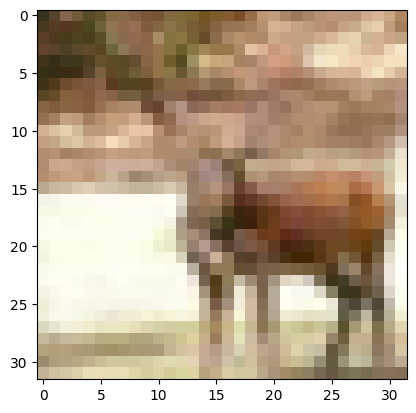

In [9]:
i=1001
plt.imshow(X_train[i])
print(y_train[i])

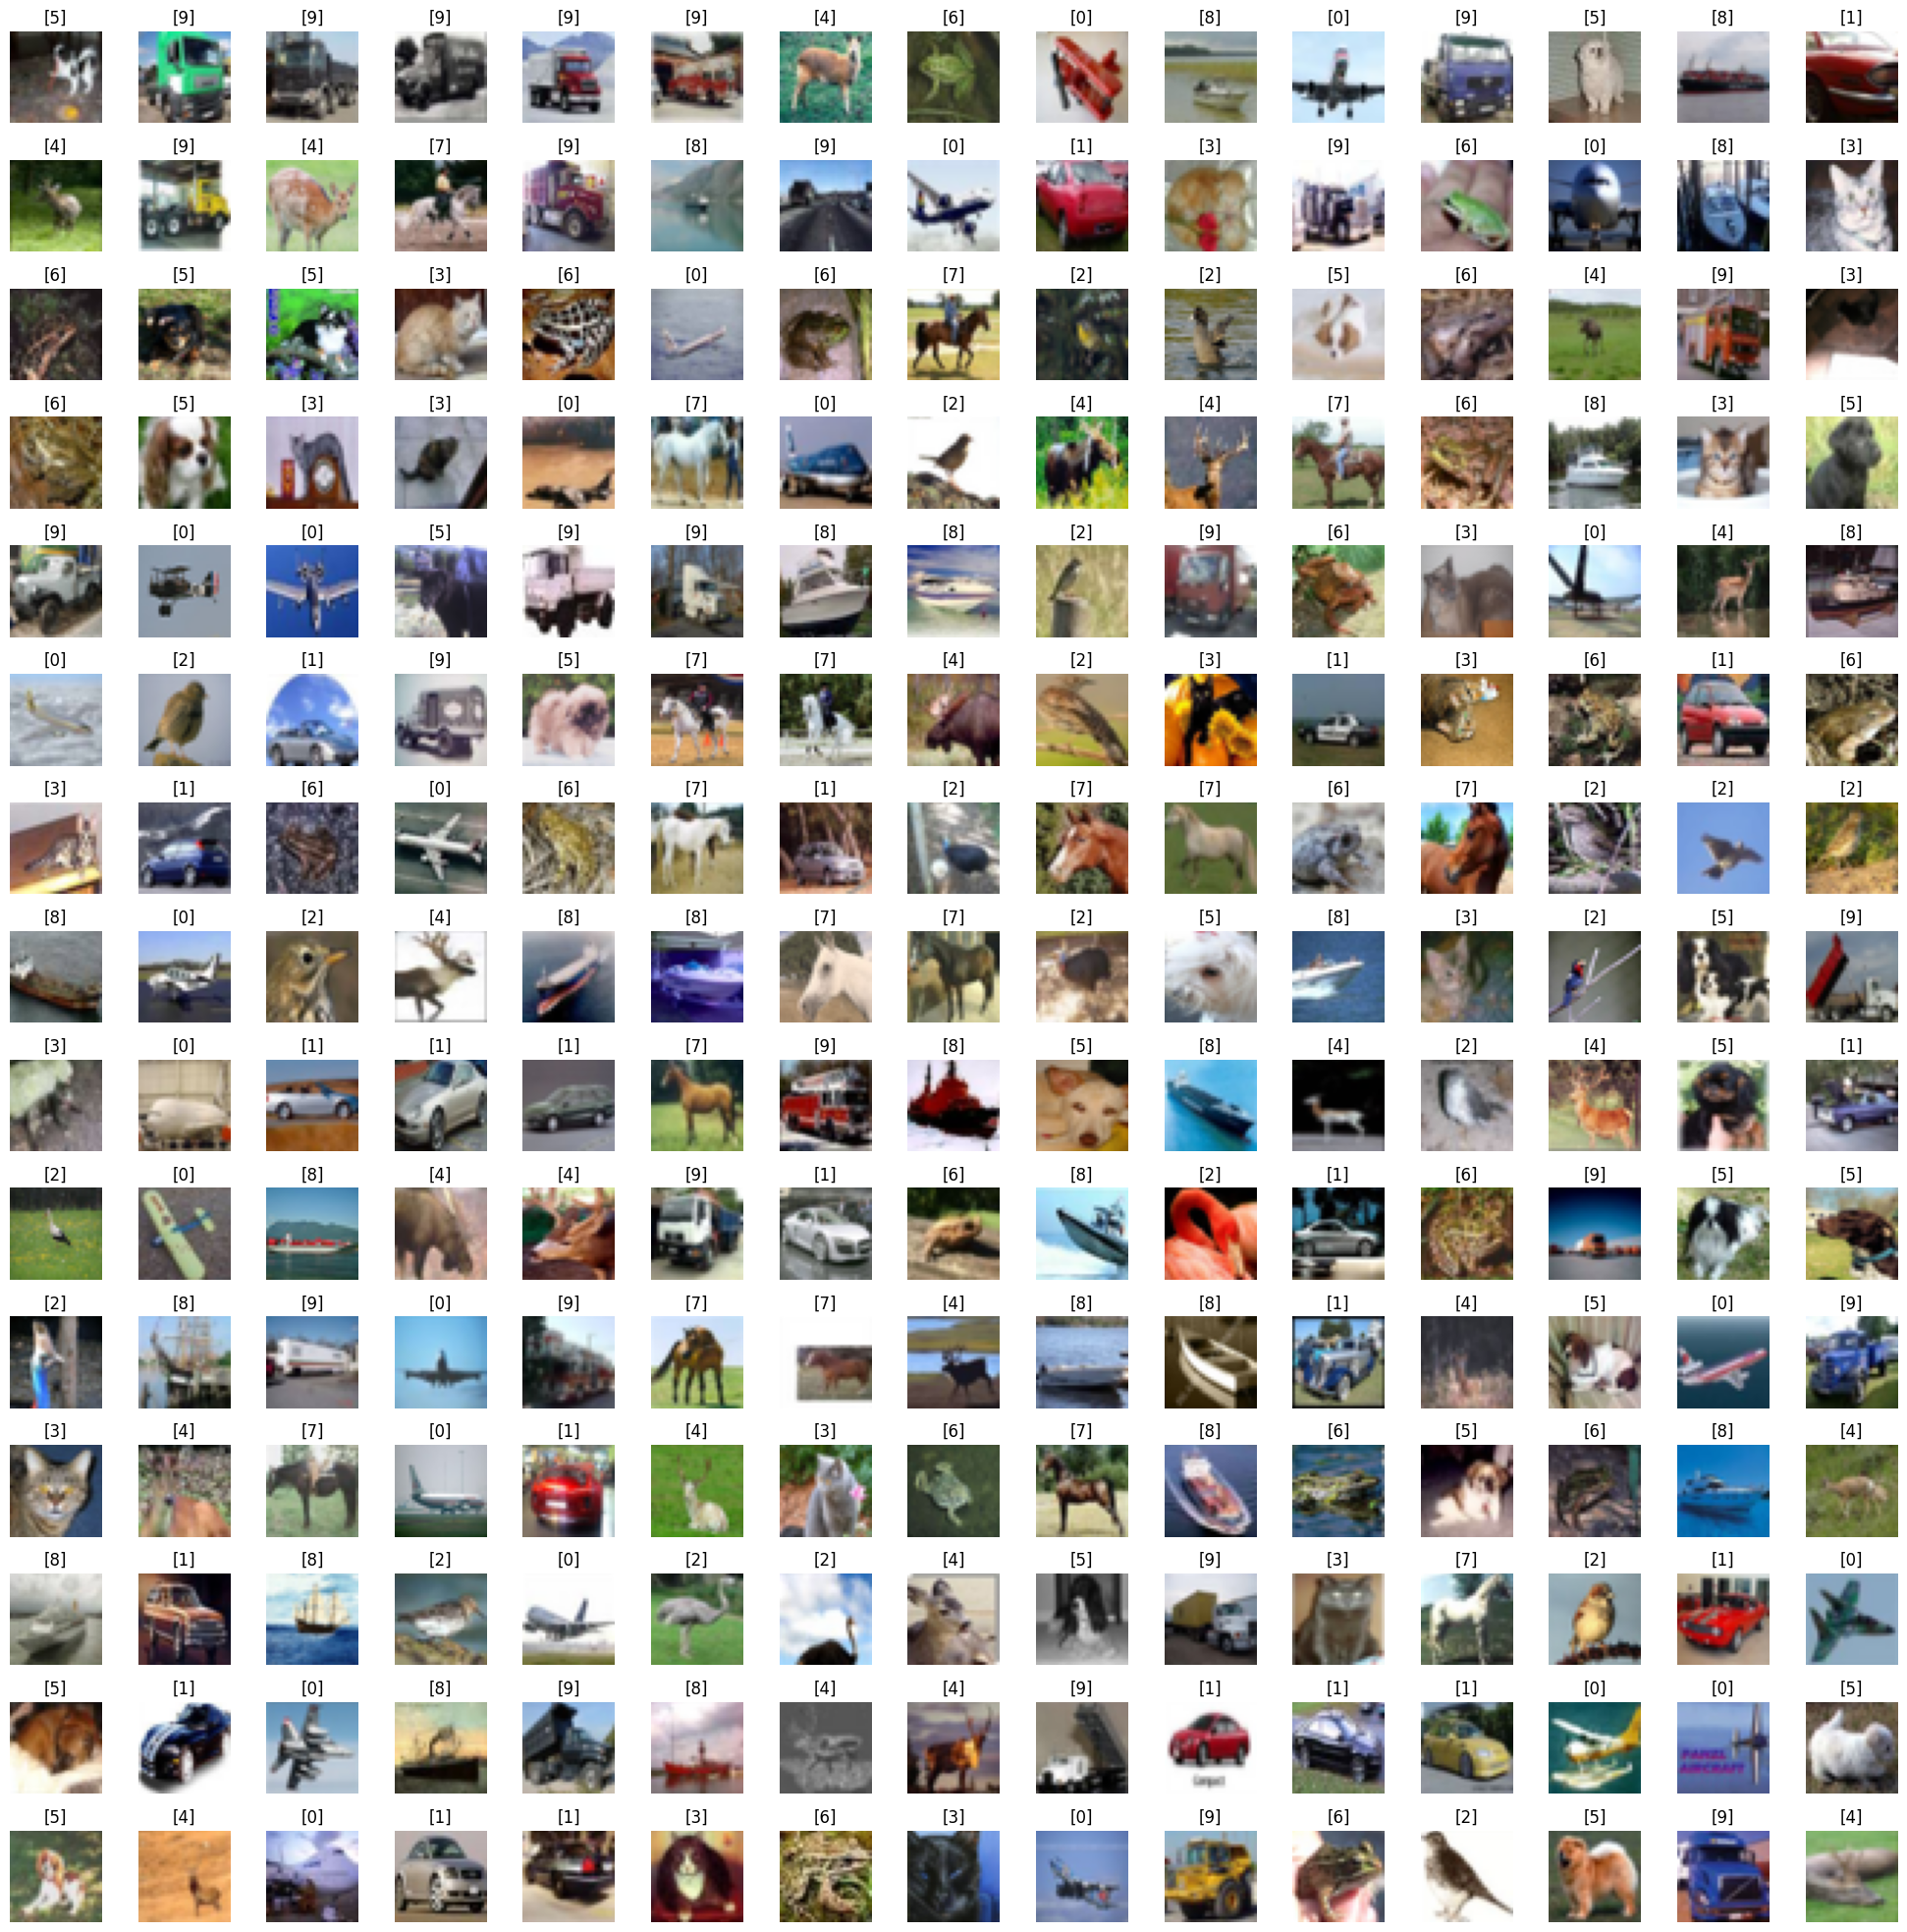

In [10]:
W_grid=15
L_grid=15
fig,axes=plt.subplots(L_grid,W_grid,figsize=(25,25))
axes=axes.ravel()
n_training =len(X_train)

for i in np.arange(0,L_grid*W_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [11]:
n_training

50000

# DATA PREPARATION

In [13]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [14]:
number_cat=10

In [15]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [16]:
import keras
y_train=keras.utils.to_categorical(y_train,number_cat)

In [17]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [18]:
y_test=keras.utils.to_categorical(y_test,number_cat)

In [19]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [20]:
X_train=X_train/255
X_test=X_test/255

In [21]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [22]:
X_train.shape

(50000, 32, 32, 3)

In [23]:
Input_shape=X_train.shape[1:]

In [24]:
Input_shape

(32, 32, 3)

# TRAIN THE MODEL

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D ,MaxPooling2D, AveragePooling2D ,Dense,Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [27]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=Input_shape))
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=512,activation='relu'))
cnn_model.add(Dense(units=512,activation='relu'))
cnn_model.add(Dense(units=10,activation='softmax'))

C:\Users\arun2\Downloads\ML_P02_DNN-CiFAR-10_CLASSIFICATION\P02_venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])


In [29]:
cnn_model.fit(X_train,y_train,batch_size=32,epochs=2,shuffle=True)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 45ms/step - accuracy: 0.3221 - loss: 1.8471
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.5700 - loss: 1.2156


# EVALUATE THE MODEL

In [54]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy:{}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6722 - loss: 0.9519
Test Accuracy:0.6700999736785889


In [63]:
# predicted_classes=cnn_model.predict_classes(X_test)
# predicted_classes
predicted_probabilities = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


array([3, 0, 0, ..., 5, 4, 7])

In [65]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [67]:
y_test=y_test.argmax(1)

In [69]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

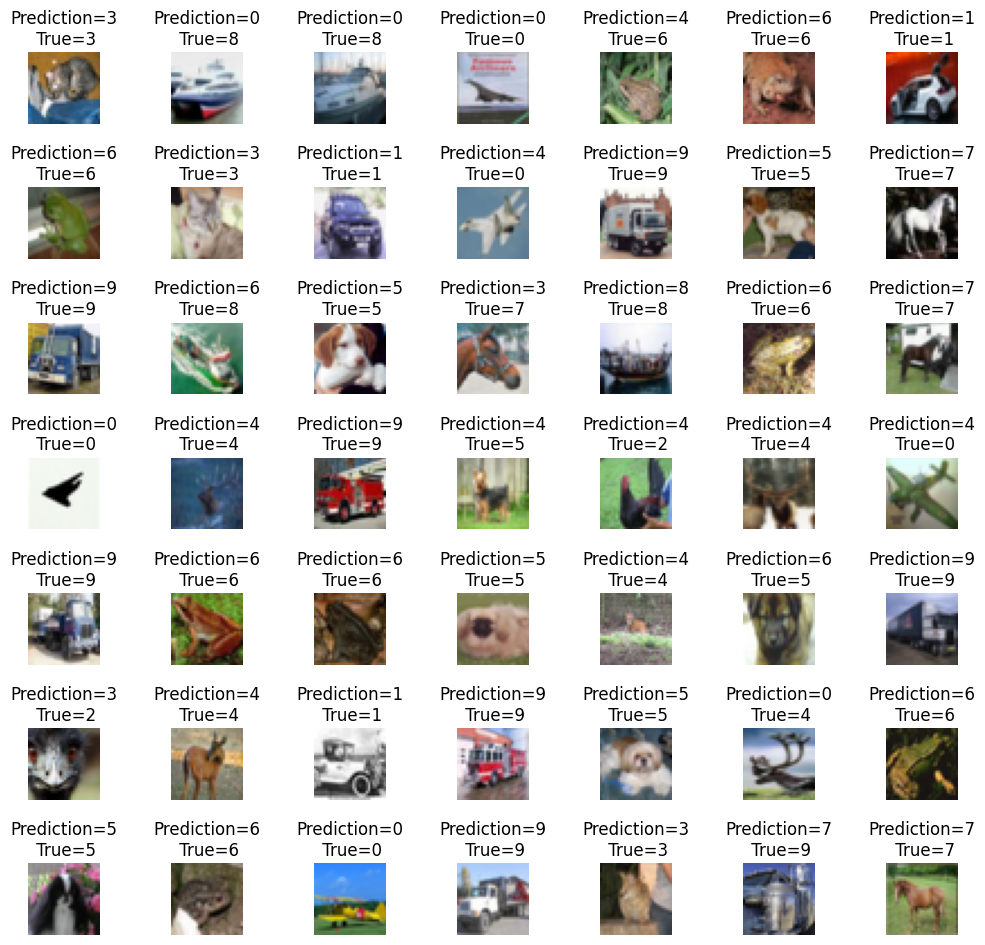

In [75]:
L=7
W=7
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction={}\n True={}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

<Axes: >

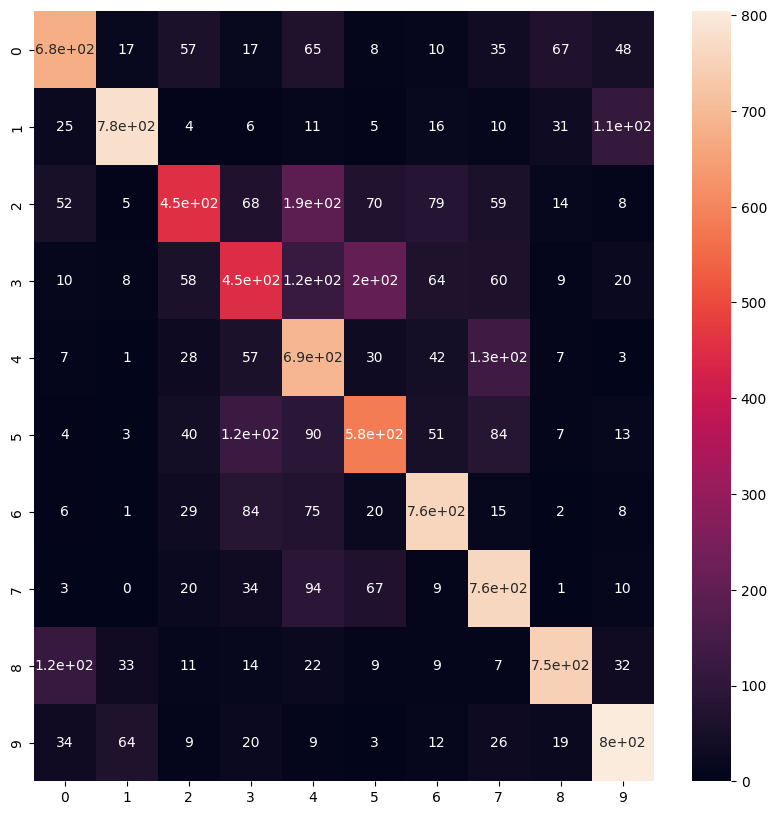

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm= confusion_matrix(y_test,predicted_classes)
cm

plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

# SAVING THE MODEL

In [88]:
import os
directory=os.path.join(os.getcwd(),'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)

model_path=os.path.join(directory,'keras_cifar10_trained_model.keras')
cnn_model.save(model_path)

# IMPROVING THE MODEL WITH DATA AUGMENTATION

## Step 1 DATA Augmentation for CiFAR DataSet

In [102]:
import keras
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) =cifar10.load_data()

In [104]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [106]:
X_train.shape

(50000, 32, 32, 3)

In [114]:
n=8
X_train_sample=X_train[:n]


In [116]:
X_train_sample.shape

(8, 32, 32, 3)

In [122]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(rotation_range=90)
datagen_train.fit(X_train)


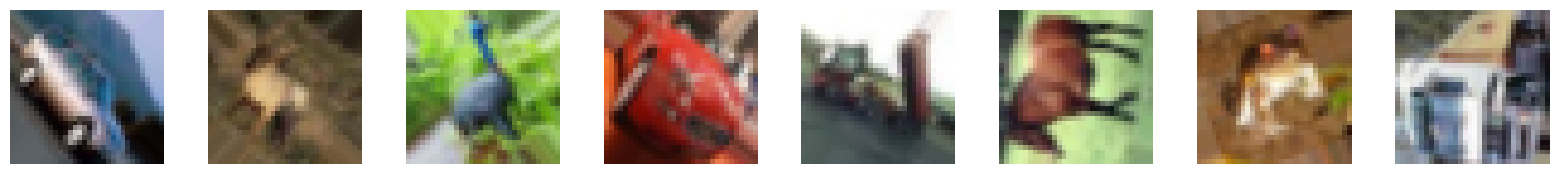

In [128]:
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 2))
for x_batch in datagen_train.flow(X_train_sample, batch_size=n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, i + 1)
        img = Image.fromarray(x_batch[i].astype('uint8'))
        ax.imshow(img)
        ax.axis('off')
    break  


## Step 2 Model Training using Augmented DataSet

In [134]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)


In [136]:
datagen.fit(X_train)

In [142]:
from keras.utils import to_categorical

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [144]:
cnn_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=2
)


Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.2580 - loss: 5.7273
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.3582 - loss: 1.7867


In [148]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3881 - loss: 1.9389
Test accuracy 0.38019999861717224


In [153]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.keras')
cnn_model.save(model_path)